# Tech Challenge 2
TECH CHALLENGE 2

Sobre os campos que deverão ser analisados:

A tabela de dados históricos do Índice Bovespa fornece um resumo do comportamento do principal indicador da bolsa de valores brasileira, a B3, em um determinado dia de negociação. Cada coluna representa um aspecto fundamental do desempenho do índice naquele pregão.

Data: este campo indica o dia, mês e ano a que se referem os dados de negociação. Cada linha da tabela corresponde a um pregão específico, permitindo a análise da evolução do índice ao longo do tempo.

Último: refere-se ao valor de fechamento do Índice Bovespa na data especificada. É o último valor calculado para o índice no final do pregão. Este é o número mais utilizado para representar o desempenho do índice em um determinado dia.

Abertura: indica o valor de abertura do índice, ou seja, o seu primeiro valor registrado no início do pregão daquele dia. Este valor pode ser diferente do fechamento do dia anterior devido a eventos ocorridos fora do horário de negociação (como negociações no after-market ou notícias relevantes) que influenciam as expectativas dos investidores.

Máxima: este campo mostra o ponto mais alto que o Índice Bovespa atingiu durante todo o período de negociação (pregão) daquela data. A máxima representa o pico de otimismo ou a maior força compradora do mercado no dia.

Mínima: apresenta o ponto mais baixo que o Índice Bovespa alcançou durante o pregão. A mínima representa o pico de pessimismo ou a maior força vendedora do mercado no dia. A diferença entre a máxima e a mínima indica a volatilidade do índice no intradia.

Vol. (Volume): este campo representa o volume financeiro total negociado das ações que compõem a carteira teórica do Ibovespa durante o dia. Um volume elevado geralmente indica maior liquidez e convicção nos movimentos de preço. O valor é tipicamente expresso em moeda local (Reais - BRL) e abreviado.

Var% (Variação Percentual): indica a mudança percentual do valor do índice, comparando o preço de fechamento ("Último") do dia atual com o preço de fechamento do dia anterior. É a forma mais comum de medir o rendimento diário do índice. Um sinal de + indica um ganho, enquanto um sinal de - indicaria uma perda.


In [1]:
import pandas as pd

df_ibovespa = pd.read_csv("/content/Dados Históricos - Ibovespa.csv")
display(df_ibovespa.head())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.06.2025,138.855,136.865,139.103,136.430,"7,68B","1,45%"
1,27.06.2025,136.866,137.113,137.209,136.469,"6,24B","-0,18%"
2,26.06.2025,137.114,135.767,137.353,135.756,"8,02B","0,99%"
3,25.06.2025,135.767,137.163,137.163,135.565,"7,71B","-1,02%"
4,24.06.2025,137.165,136.552,138.156,136.254,"8,08B","0,45%"


## Limpeza inicial dos dados

### Objetivo:
Inspecionar os dados para identificar e tratar valores ausentes, formatos incorretos ou quaisquer outras anomalias.


In [2]:
df_ibovespa.info()
display(df_ibovespa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1118 non-null   object 
 1   Último    1118 non-null   float64
 2   Abertura  1118 non-null   float64
 3   Máxima    1118 non-null   float64
 4   Mínima    1118 non-null   float64
 5   Vol.      1118 non-null   object 
 6   Var%      1118 non-null   object 
dtypes: float64(4), object(3)
memory usage: 61.3+ KB


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.06.2025,138.855,136.865,139.103,136.430,"7,68B","1,45%"
1,27.06.2025,136.866,137.113,137.209,136.469,"6,24B","-0,18%"
2,26.06.2025,137.114,135.767,137.353,135.756,"8,02B","0,99%"
3,25.06.2025,135.767,137.163,137.163,135.565,"7,71B","-1,02%"
4,24.06.2025,137.165,136.552,138.156,136.254,"8,08B","0,45%"


In [3]:
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'], format='%d.%m.%Y')

for col in ['Último', 'Abertura', 'Máxima', 'Mínima']:
    df_ibovespa[col] = df_ibovespa[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_ibovespa['Vol.'] = df_ibovespa['Vol.'].astype(str).str.replace(',', '.', regex=False)
df_ibovespa['Vol.'] = df_ibovespa['Vol.'].str.replace('B', 'e9', regex=False).str.replace('M', 'e6', regex=False)
df_ibovespa['Vol.'] = pd.to_numeric(df_ibovespa['Vol.'])

df_ibovespa['Var%'] = df_ibovespa['Var%'].astype(str).str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float) / 100

display(df_ibovespa.info())
display(df_ibovespa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1118 non-null   datetime64[ns]
 1   Último    1118 non-null   float64       
 2   Abertura  1118 non-null   float64       
 3   Máxima    1118 non-null   float64       
 4   Mínima    1118 non-null   float64       
 5   Vol.      1118 non-null   float64       
 6   Var%      1118 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 61.3 KB


None

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045


## Engenharia de atributos básicos

### Objetivo:
Criar atributos como variações diárias, semanais e mensais do preço de fechamento.


In [4]:
df_ibovespa['Daily_Change'] = df_ibovespa['Último'].pct_change()

df_weekly = df_ibovespa.set_index('Data')['Último'].resample('W').ffill().pct_change().reset_index()
df_weekly = df_weekly.rename(columns={'Último': 'Weekly_Change'})
df_ibovespa = pd.merge(df_ibovespa, df_weekly, on='Data', how='left')

df_monthly = df_ibovespa.set_index('Data')['Último'].resample('M').ffill().pct_change().reset_index()
df_monthly = df_monthly.rename(columns={'Último': 'Monthly_Change'})
df_ibovespa = pd.merge(df_ibovespa, df_monthly, on='Data', how='left')

display(df_ibovespa.head())
display(df_ibovespa.tail())

/tmp/ipython-input-3504921356.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_ibovespa.set_index('Data')['Último'].resample('M').ffill().pct_change().reset_index()


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145,NaN,NaN,0.01334
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018,-0.014324,NaN,NaN
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099,0.001812,NaN,NaN
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102,-0.009824,NaN,NaN
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045,0.010297,NaN,NaN


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change
1113,2021-01-08,125077.0,122387.0,125324.0,122386.0,11090000.0,0.0220,0.014782,NaN,NaN
1114,2021-01-07,122386.0,119103.0,122697.0,119101.0,11770000.0,0.0276,-0.021515,NaN,NaN
1115,2021-01-06,1191.0,119377.0,120924.0,118917.0,11640000.0,-0.0023,-0.990268,NaN,NaN
1116,2021-01-05,119376.0,118835.0,11979.0,116756.0,9260000.0,0.0044,99.231738,NaN,NaN
1117,2021-01-04,118855.0,119024.0,120354.0,118062.0,8740000.0,-0.0014,-0.004364,NaN,NaN


## Engenharia de atributos de médias móveis

### Objetivo:
Calcular médias móveis de diferentes períodos (por exemplo, 7, 30, 90 dias) para o preço de fechamento.


In [5]:
df_ibovespa['MA_7_days'] = df_ibovespa['Último'].rolling(window=7).mean()
df_ibovespa['MA_30_days'] = df_ibovespa['Último'].rolling(window=30).mean()
df_ibovespa['MA_90_days'] = df_ibovespa['Último'].rolling(window=90).mean()

display(df_ibovespa.head())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,MA_7_days,MA_30_days,MA_90_days
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145,NaN,NaN,0.01334,NaN,NaN,NaN
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018,-0.014324,NaN,NaN,NaN,NaN,NaN
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099,0.001812,NaN,NaN,NaN,NaN,NaN
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102,-0.009824,NaN,NaN,NaN,NaN,NaN
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045,0.010297,NaN,NaN,NaN,NaN,NaN


## Engenharia de atributos de indicadores técnicos

### Objetivo:
Calcular indicadores técnicos comuns, como RSI (Índice de Força Relativa), MACD (Convergência/Divergência de Médias Móveis) e Bandas de Bollinger.


In [6]:
# Calculate RSI
delta = df_ibovespa['Último'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_ibovespa['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
ema_12 = df_ibovespa['Último'].ewm(span=12, adjust=False).mean()
ema_26 = df_ibovespa['Último'].ewm(span=26, adjust=False).mean()
df_ibovespa['MACD'] = ema_12 - ema_26
df_ibovespa['MACD_Signal'] = df_ibovespa['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
df_ibovespa['Bollinger_Mid'] = df_ibovespa['Último'].rolling(window=20).mean()
std_20 = df_ibovespa['Último'].rolling(window=20).std()
df_ibovespa['Bollinger_Upper'] = df_ibovespa['Bollinger_Mid'] + (std_20 * 2)
df_ibovespa['Bollinger_Lower'] = df_ibovespa['Bollinger_Mid'] - (std_20 * 2)

display(df_ibovespa.head())
display(df_ibovespa.tail())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,MA_7_days,MA_30_days,MA_90_days,RSI,MACD,MACD_Signal,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145,NaN,NaN,0.01334,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018,-0.014324,NaN,NaN,NaN,NaN,NaN,NaN,-158.666667,-31.733333,NaN,NaN,NaN
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099,0.001812,NaN,NaN,NaN,NaN,NaN,NaN,-261.386515,-77.663970,NaN,NaN,NaN
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102,-0.009824,NaN,NaN,NaN,NaN,NaN,NaN,-446.339256,-151.399027,NaN,NaN,NaN
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045,0.010297,NaN,NaN,NaN,NaN,NaN,NaN,-474.637395,-216.046700,NaN,NaN,NaN


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,MA_7_days,MA_30_days,MA_90_days,RSI,MACD,MACD_Signal,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower
1113,2021-01-08,125077.0,122387.0,125324.0,122386.0,11090000.0,0.0220,0.014782,NaN,NaN,122762.142857,108228.300000,103786.700000,52.158685,6283.628563,4514.251065,109137.15,175877.142907,42397.157093
1114,2021-01-07,122386.0,119103.0,122697.0,119101.0,11770000.0,0.0276,-0.021515,NaN,NaN,122925.571429,108466.933333,103783.200000,50.759188,6214.462433,4854.293338,114655.25,163414.931735,65895.568265
1115,2021-01-06,1191.0,119377.0,120924.0,118917.0,11640000.0,-0.0023,-0.990268,NaN,NaN,105903.000000,104751.033333,102433.811111,33.563962,-3578.524848,3167.729701,108751.75,179012.996373,38490.503627
1116,2021-01-05,119376.0,118835.0,11979.0,116756.0,9260000.0,0.0044,99.231738,NaN,NaN,105316.571429,104782.533333,103623.566667,50.312109,-1782.449073,2177.693946,108734.30,178984.243856,38484.356144
1117,2021-01-04,118855.0,119024.0,120354.0,118062.0,8740000.0,-0.0014,-0.004364,NaN,NaN,104876.857143,104771.066667,103578.200000,64.782956,-396.515641,1662.852029,108765.35,179033.519619,38497.180381


## Engenharia de atributos de lag

### Objetivo:
Criar atributos de lag para o preço de fechamento e outros atributos relevantes para capturar a dependência temporal.


In [7]:
cols_to_lag = ['Último', 'Daily_Change', 'RSI', 'MACD', 'Bollinger_Mid']
lag_periods = [1, 5, 30]

for col in cols_to_lag:
    for lag in lag_periods:
        df_ibovespa[f'{col}_lag_{lag}'] = df_ibovespa[col].shift(lag)

display(df_ibovespa.head())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,...,Daily_Change_lag_30,RSI_lag_1,RSI_lag_5,RSI_lag_30,MACD_lag_1,MACD_lag_5,MACD_lag_30,Bollinger_Mid_lag_1,Bollinger_Mid_lag_5,Bollinger_Mid_lag_30
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145,NaN,NaN,0.01334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018,-0.014324,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099,0.001812,NaN,NaN,...,NaN,NaN,NaN,NaN,-158.666667,NaN,NaN,NaN,NaN,NaN
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102,-0.009824,NaN,NaN,...,NaN,NaN,NaN,NaN,-261.386515,NaN,NaN,NaN,NaN,NaN
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045,0.010297,NaN,NaN,...,NaN,NaN,NaN,NaN,-446.339256,NaN,NaN,NaN,NaN,NaN


## Engenharia de atributos de volatilidade

### Objetivo:
Calcular medidas de volatilidade, como desvio padrão do preço de fechamento em janelas deslizantes.


In [8]:
df_ibovespa['Volatility_7_days'] = df_ibovespa['Último'].rolling(window=7).std()
df_ibovespa['Volatility_30_days'] = df_ibovespa['Último'].rolling(window=30).std()
df_ibovespa['Volatility_90_days'] = df_ibovespa['Último'].rolling(window=90).std()

display(df_ibovespa.head())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,...,RSI_lag_30,MACD_lag_1,MACD_lag_5,MACD_lag_30,Bollinger_Mid_lag_1,Bollinger_Mid_lag_5,Bollinger_Mid_lag_30,Volatility_7_days,Volatility_30_days,Volatility_90_days
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145,NaN,NaN,0.01334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018,-0.014324,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099,0.001812,NaN,NaN,...,NaN,-158.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102,-0.009824,NaN,NaN,...,NaN,-261.386515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045,0.010297,NaN,NaN,...,NaN,-446.339256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Criação do atributo alvo

### Objetivo:
Definir o atributo alvo, que será binário (alta/baixa), indicando se o preço de fechamento será maior ou menor após 30 dias.


In [9]:
df_ibovespa['Target'] = (df_ibovespa['Último'].shift(-30) > df_ibovespa['Último']).astype(int)

display(df_ibovespa.head())
display(df_ibovespa.tail())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,...,MACD_lag_1,MACD_lag_5,MACD_lag_30,Bollinger_Mid_lag_1,Bollinger_Mid_lag_5,Bollinger_Mid_lag_30,Volatility_7_days,Volatility_30_days,Volatility_90_days,Target
0,2025-06-30,138855.0,136865.0,139103.0,13643.0,7.680000e+09,0.0145,NaN,NaN,0.01334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2025-06-27,136866.0,137113.0,137209.0,136469.0,6.240000e+09,-0.0018,-0.014324,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,0.0099,0.001812,NaN,NaN,...,-158.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,-0.0102,-0.009824,NaN,NaN,...,-261.386515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,0.0045,0.010297,NaN,NaN,...,-446.339256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,...,MACD_lag_1,MACD_lag_5,MACD_lag_30,Bollinger_Mid_lag_1,Bollinger_Mid_lag_5,Bollinger_Mid_lag_30,Volatility_7_days,Volatility_30_days,Volatility_90_days,Target
1113,2021-01-08,125077.0,122387.0,125324.0,122386.0,11090000.0,0.0220,0.014782,NaN,NaN,...,6006.518736,3932.107375,-567.146917,108868.10,102161.20,98146.95,1656.660338,34017.459383,36827.599522,0
1114,2021-01-07,122386.0,119103.0,122697.0,119101.0,11770000.0,0.0276,-0.021515,NaN,NaN,...,6283.628563,4779.522915,1000.256669,109137.15,102363.80,98245.20,1533.559461,34093.274206,36825.796682,0
1115,2021-01-06,1191.0,119377.0,120924.0,118917.0,11640000.0,-0.0023,-0.990268,NaN,NaN,...,6214.462433,5265.497792,2012.743733,114655.25,108400.80,98129.65,46185.139064,39297.463533,38321.855869,0
1116,2021-01-05,119376.0,118835.0,11979.0,116756.0,9260000.0,0.0044,99.231738,NaN,NaN,...,-3578.524848,5750.971011,3242.792074,108751.75,108678.95,98240.10,45950.209970,39309.184220,37135.861917,0
1117,2021-01-04,118855.0,119024.0,120354.0,118062.0,8740000.0,-0.0014,-0.004364,NaN,NaN,...,-1782.449073,6006.518736,4230.815224,108734.30,108868.10,98458.30,45779.108566,39304.883798,37114.489339,0


Matriz de correlação

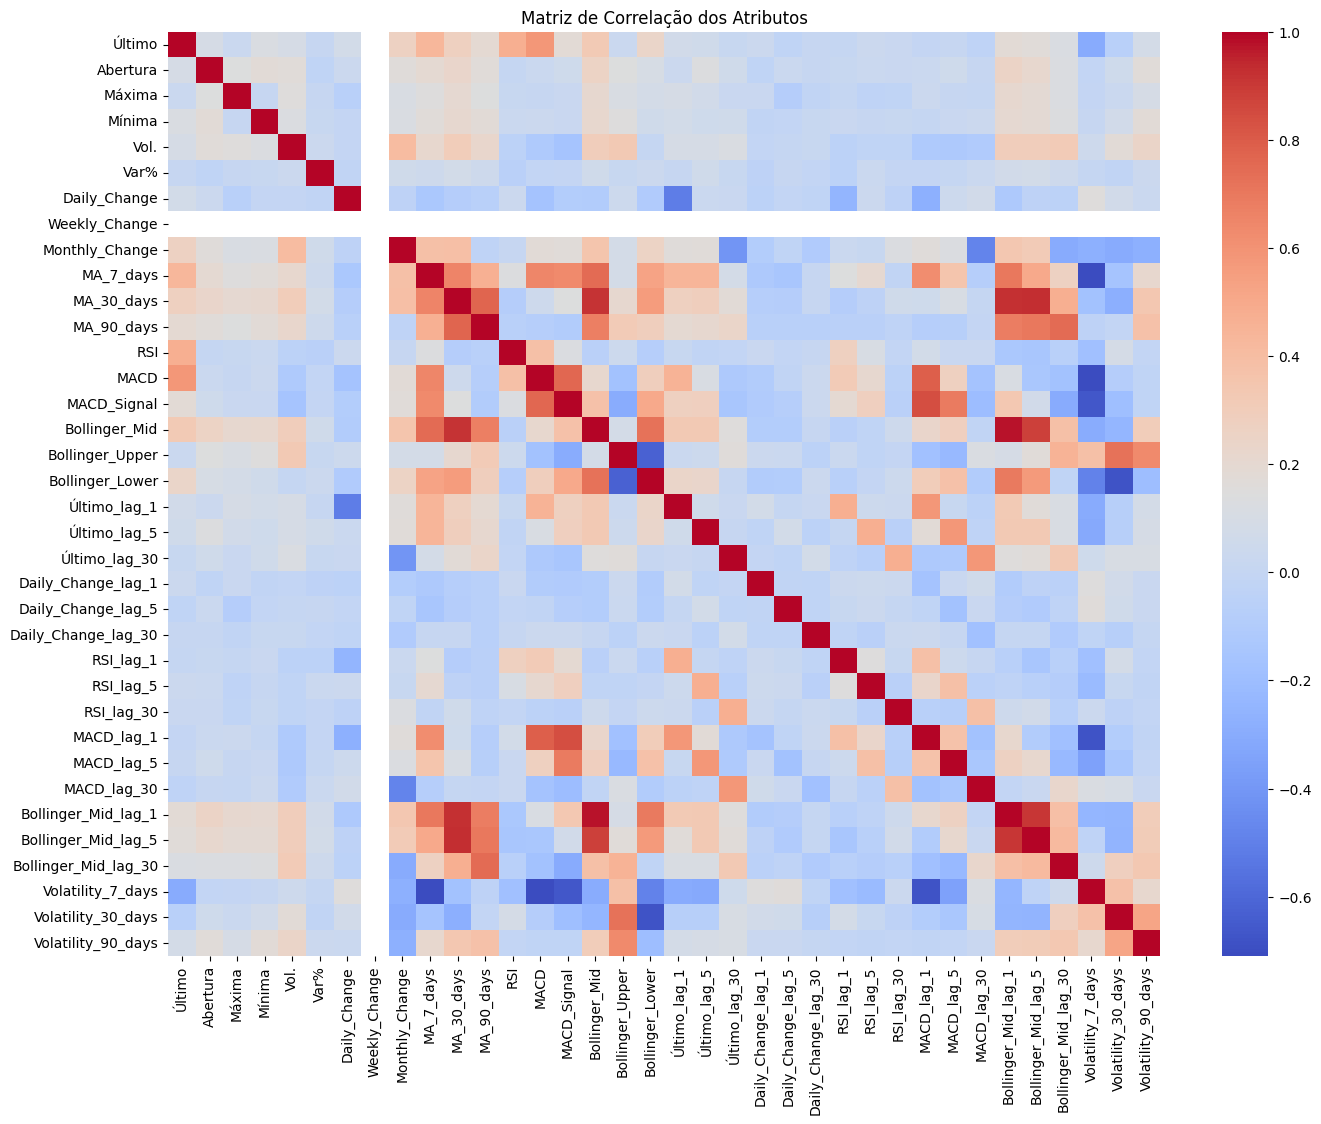

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, excluding non-numeric columns and the target
correlation_matrix = df_ibovespa.drop(['Data', 'Target'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação dos Atributos')
plt.show()

Decomposição série temporal

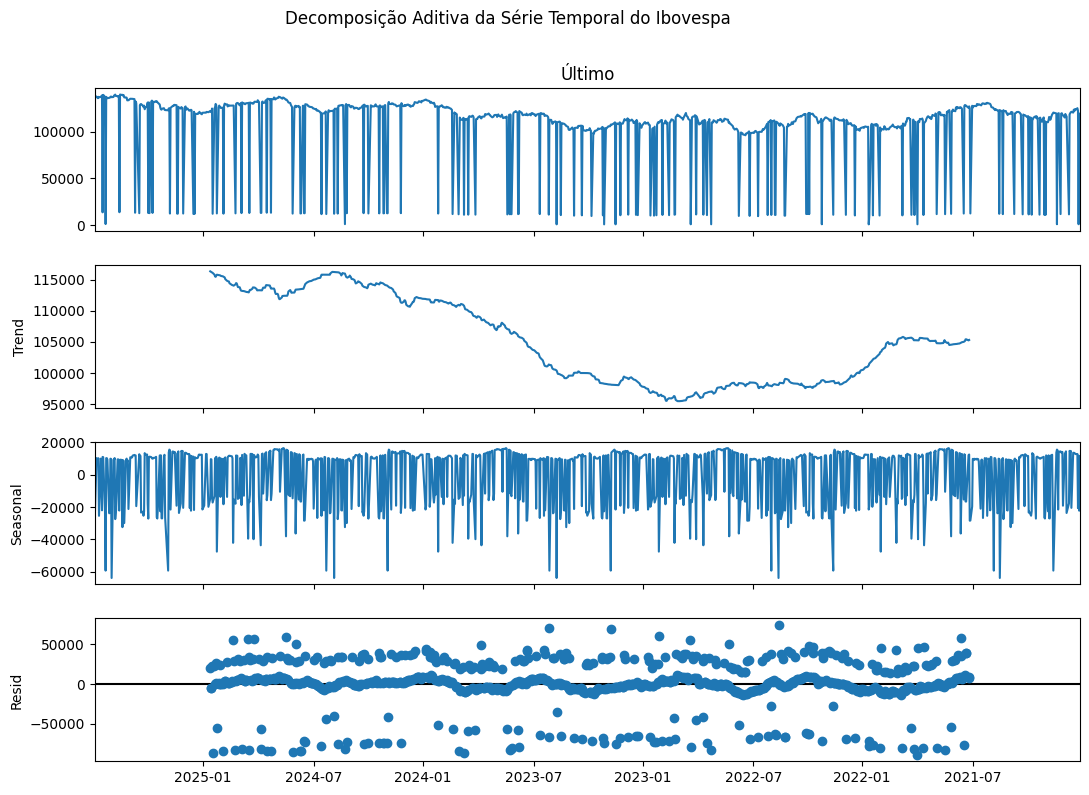

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set the 'Data' column as the index for time series decomposition
df_ts = df_ibovespa.set_index('Data')

# Perform additive decomposition
decomposition = seasonal_decompose(df_ts['Último'], model='additive', period=252)

# Plot the decomposition components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Decomposição Aditiva da Série Temporal do Ibovespa', y=1.02)
plt.show()



## Preparação final dos dados

### Objetivo:
Lidar com quaisquer valores ausentes resultantes da engenharia de atributos e dividir o conjunto de dados em conjuntos de treino e teste.


In [12]:
print(df_ibovespa.isnull().sum())

Data                       0
Último                     0
Abertura                   0
Máxima                     0
Mínima                     0
Vol.                       0
Var%                       0
Daily_Change               1
Weekly_Change           1118
Monthly_Change          1082
MA_7_days                  6
MA_30_days                29
MA_90_days                89
RSI                       13
MACD                       0
MACD_Signal                0
Bollinger_Mid             19
Bollinger_Upper           19
Bollinger_Lower           19
Último_lag_1               1
Último_lag_5               5
Último_lag_30             30
Daily_Change_lag_1         2
Daily_Change_lag_5         6
Daily_Change_lag_30       31
RSI_lag_1                 14
RSI_lag_5                 18
RSI_lag_30                43
MACD_lag_1                 1
MACD_lag_5                 5
MACD_lag_30               30
Bollinger_Mid_lag_1       20
Bollinger_Mid_lag_5       24
Bollinger_Mid_lag_30      49
Volatility_7_d

In [13]:
df_ibovespa.dropna(inplace=True)
print(df_ibovespa.isnull().sum())

Data                    0
Último                  0
Abertura                0
Máxima                  0
Mínima                  0
Vol.                    0
Var%                    0
Daily_Change            0
Weekly_Change           0
Monthly_Change          0
MA_7_days               0
MA_30_days              0
MA_90_days              0
RSI                     0
MACD                    0
MACD_Signal             0
Bollinger_Mid           0
Bollinger_Upper         0
Bollinger_Lower         0
Último_lag_1            0
Último_lag_5            0
Último_lag_30           0
Daily_Change_lag_1      0
Daily_Change_lag_5      0
Daily_Change_lag_30     0
RSI_lag_1               0
RSI_lag_5               0
RSI_lag_30              0
MACD_lag_1              0
MACD_lag_5              0
MACD_lag_30             0
Bollinger_Mid_lag_1     0
Bollinger_Mid_lag_5     0
Bollinger_Mid_lag_30    0
Volatility_7_days       0
Volatility_30_days      0
Volatility_90_days      0
Target                  0
dtype: int64

In [14]:
display(df_ibovespa.head())
display(df_ibovespa.info())

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,Weekly_Change,Monthly_Change,...,MACD_lag_1,MACD_lag_5,MACD_lag_30,Bollinger_Mid_lag_1,Bollinger_Mid_lag_5,Bollinger_Mid_lag_30,Volatility_7_days,Volatility_30_days,Volatility_90_days,Target


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data                  0 non-null      datetime64[ns]
 1   Último                0 non-null      float64       
 2   Abertura              0 non-null      float64       
 3   Máxima                0 non-null      float64       
 4   Mínima                0 non-null      float64       
 5   Vol.                  0 non-null      float64       
 6   Var%                  0 non-null      float64       
 7   Daily_Change          0 non-null      float64       
 8   Weekly_Change         0 non-null      float64       
 9   Monthly_Change        0 non-null      float64       
 10  MA_7_days             0 non-null      float64       
 11  MA_30_days            0 non-null      float64       
 12  MA_90_days            0 non-null      float64       
 13  RSI                   0 non-null     

None

In [15]:
df_ibovespa = pd.read_csv("/content/Dados Históricos - Ibovespa.csv")
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'], format='%d.%m.%Y')
for col in ['Último', 'Abertura', 'Máxima', 'Mínima']:
    df_ibovespa[col] = df_ibovespa[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df_ibovespa['Vol.'] = df_ibovespa['Vol.'].astype(str).str.replace(',', '.', regex=False)
df_ibovespa['Vol.'] = df_ibovespa['Vol.'].str.replace('B', 'e9', regex=False).str.replace('M', 'e6', regex=False)
df_ibovespa['Vol.'] = pd.to_numeric(df_ibovespa['Vol.'])
df_ibovespa['Var%'] = df_ibovespa['Var%'].astype(str).str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float) / 100

df_ibovespa['Daily_Change'] = df_ibovespa['Último'].pct_change()
df_weekly = df_ibovespa.set_index('Data')['Último'].resample('W').ffill().pct_change().reset_index()
df_weekly = df_weekly.rename(columns={'Último': 'Weekly_Change'})
df_ibovespa = pd.merge(df_ibovespa, df_weekly, on='Data', how='left')
df_monthly = df_ibovespa.set_index('Data')['Último'].resample('M').ffill().pct_change().reset_index()
df_monthly = df_monthly.rename(columns={'Último': 'Monthly_Change'})
df_ibovespa = pd.merge(df_ibovespa, df_monthly, on='Data', how='left')

df_ibovespa['MA_7_days'] = df_ibovespa['Último'].rolling(window=7).mean()
df_ibovespa['MA_30_days'] = df_ibovespa['Último'].rolling(window=30).mean()
df_ibovespa['MA_90_days'] = df_ibovespa['Último'].rolling(window=90).mean()

delta = df_ibovespa['Último'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_ibovespa['RSI'] = 100 - (100 / (1 + rs))
ema_12 = df_ibovespa['Último'].ewm(span=12, adjust=False).mean()
ema_26 = df_ibovespa['Último'].ewm(span=26, adjust=False).mean()
df_ibovespa['MACD'] = ema_12 - ema_26
df_ibovespa['MACD_Signal'] = df_ibovespa['MACD'].ewm(span=9, adjust=False).mean()
df_ibovespa['Bollinger_Mid'] = df_ibovespa['Último'].rolling(window=20).mean()
std_20 = df_ibovespa['Último'].rolling(window=20).std()
df_ibovespa['Bollinger_Upper'] = df_ibovespa['Bollinger_Mid'] + (std_20 * 2)
df_ibovespa['Bollinger_Lower'] = df_ibovespa['Bollinger_Mid'] - (std_20 * 2)

cols_to_lag = ['Último', 'Daily_Change', 'RSI', 'MACD', 'Bollinger_Mid']
lag_periods = [1, 5, 30]
for col in cols_to_lag:
    for lag in lag_periods:
        df_ibovespa[f'{col}_lag_{lag}'] = df_ibovespa[col].shift(lag)

df_ibovespa['Volatility_7_days'] = df_ibovespa['Último'].rolling(window=7).std()
df_ibovespa['Volatility_30_days'] = df_ibovespa['Último'].rolling(window=30).std()
df_ibovespa['Volatility_90_days'] = df_ibovespa['Último'].rolling(window=90).std()

df_ibovespa['Target'] = (df_ibovespa['Último'].shift(-30) > df_ibovespa['Último']).astype(int)

print("NaN count per column before dropping:")
display(df_ibovespa.isnull().sum())

NaN count per column before dropping:


/tmp/ipython-input-586498708.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_ibovespa.set_index('Data')['Último'].resample('M').ffill().pct_change().reset_index()


,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0
Daily_Change,1
Weekly_Change,1118
Monthly_Change,1082


**detalhamento**:
O dataframe fica vazio após eliminar linhas com NaNs porque o processo de engenharia de recursos, particularmente os atrasos e os cálculos contínuos, introduz um número significativo de NaNs no início e no final da série temporal. Eliminar todas as linhas com qualquer NaN remove todos os dados. Para resolver isso, primeiro preencherei os NaNs iniciais introduzidos pelos indicadores rolantes e técnicos com preenchimento direto e, em seguida, eliminarei apenas os NaNs restantes introduzidos pela variável de destino e pelos recursos de atraso. Isso deve preservar mais dados.



In [16]:
df_ibovespa = pd.read_csv("/content/Dados Históricos - Ibovespa.csv")
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'], format='%d.%m.%Y')
for col in ['Último', 'Abertura', 'Máxima', 'Mínima']:
    df_ibovespa[col] = df_ibovespa[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df_ibovespa['Vol.'] = df_ibovespa['Vol.'].astype(str).str.replace(',', '.', regex=False)
df_ibovespa['Vol.'] = df_ibovespa['Vol.'].str.replace('B', 'e9', regex=False).str.replace('M', 'e6', regex=False)
df_ibovespa['Vol.'] = pd.to_numeric(df_ibovespa['Vol.'])
df_ibovespa['Var%'] = df_ibovespa['Var%'].astype(str).str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float) / 100

df_ibovespa['Daily_Change'] = df_ibovespa['Último'].pct_change()
df_weekly = df_ibovespa.set_index('Data')['Último'].resample('W').ffill().pct_change().reset_index()
df_weekly = df_weekly.rename(columns={'Último': 'Weekly_Change'})
df_ibovespa = pd.merge(df_ibovespa, df_weekly, on='Data', how='left')
df_monthly = df_ibovespa.set_index('Data')['Último'].resample('M').ffill().pct_change().reset_index()
df_monthly = df_monthly.rename(columns={'Último': 'Monthly_Change'})
df_ibovespa = pd.merge(df_ibovespa, df_monthly, on='Data', how='left')

df_ibovespa['MA_7_days'] = df_ibovespa['Último'].rolling(window=7).mean()
df_ibovespa['MA_30_days'] = df_ibovespa['Último'].rolling(window=30).mean()
df_ibovespa['MA_90_days'] = df_ibovespa['Último'].rolling(window=90).mean()

delta = df_ibovespa['Último'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_ibovespa['RSI'] = 100 - (100 / (1 + rs))
ema_12 = df_ibovespa['Último'].ewm(span=12, adjust=False).mean()
ema_26 = df_ibovespa['Último'].ewm(span=26, adjust=False).mean()
df_ibovespa['MACD'] = ema_12 - ema_26
df_ibovespa['MACD_Signal'] = df_ibovespa['MACD'].ewm(span=9, adjust=False).mean()
df_ibovespa['Bollinger_Mid'] = df_ibovespa['Último'].rolling(window=20).mean()
std_20 = df_ibovespa['Último'].rolling(window=20).std()
df_ibovespa['Bollinger_Upper'] = df_ibovespa['Bollinger_Mid'] + (std_20 * 2)
df_ibovespa['Bollinger_Lower'] = df_ibovespa['Bollinger_Mid'] - (std_20 * 2)

cols_to_lag = ['Último', 'Daily_Change', 'RSI', 'MACD', 'Bollinger_Mid']
lag_periods = [1, 5, 30]
for col in cols_to_lag:
    for lag in lag_periods:
        df_ibovespa[f'{col}_lag_{lag}'] = df_ibovespa[col].shift(lag)

df_ibovespa['Volatility_7_days'] = df_ibovespa['Último'].rolling(window=7).std()
df_ibovespa['Volatility_30_days'] = df_ibovespa['Último'].rolling(window=30).std()
df_ibovespa['Volatility_90_days'] = df_ibovespa['Último'].rolling(window=90).std()

df_ibovespa['Target'] = (df_ibovespa['Último'].shift(-30) > df_ibovespa['Último']).astype(int)

df_ibovespa.drop(['Weekly_Change', 'Monthly_Change'], axis=1, inplace=True)
df_ibovespa.dropna(inplace=True)

print("Shape after handling NaNs:", df_ibovespa.shape)
display(df_ibovespa.isnull().sum())

X = df_ibovespa.drop(['Data', 'Target'], axis=1)
y = df_ibovespa['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

Shape after handling NaNs: (1029, 36)


/tmp/ipython-input-3784629822.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_ibovespa.set_index('Data')['Último'].resample('M').ffill().pct_change().reset_index()


,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0
Daily_Change,0
MA_7_days,0
MA_30_days,0


,Último,Abertura,Máxima,Mínima,Vol.,Var%,Daily_Change,MA_7_days,MA_30_days,MA_90_days,...,RSI_lag_30,MACD_lag_1,MACD_lag_5,MACD_lag_30,Bollinger_Mid_lag_1,Bollinger_Mid_lag_5,Bollinger_Mid_lag_30,Volatility_7_days,Volatility_30_days,Volatility_90_days
493,117426.0,119548.0,119548.0,117096.0,11030000.0,-0.0178,-0.012380,118066.142857,97530.366667,104170.533333,...,46.996826,6142.488046,5702.622718,854.359598,108668.85,98153.95,116874.70,718.624712,43557.295744,34735.056575
1077,11269.0,111191.0,114433.0,111163.0,14220000.0,0.0135,-0.902181,83941.428571,98378.133333,111123.777778,...,49.798052,1034.230412,-3611.173434,-1071.398436,98912.45,99964.10,109570.25,49623.624656,39589.070741,33696.825353
611,110916.0,111843.0,111847.0,110428.0,15940000.0,-0.0084,0.015593,111499.428571,99886.066667,95322.488889,...,50.498874,4126.443072,2014.739931,-904.682326,101125.65,95221.65,88206.80,1188.560874,31347.629395,31376.290801
571,102932.0,103121.0,104153.0,102482.0,13130000.0,-0.0018,0.002503,101880.857143,93405.433333,102251.911111,...,48.277978,1445.993213,-1097.351097,800.584769,92472.70,93267.75,96801.55,1198.137920,28248.233558,27943.694714
534,107114.0,106028.0,107731.0,105549.0,13530000.0,0.0101,-0.003108,94207.285714,102017.433333,104463.377778,...,5.599973,-770.714281,-6569.167366,-4792.344124,94514.75,96184.20,112984.55,36720.278579,32232.019738,33550.955596


,Target
493,0
1077,1
611,1
571,1
534,0


## Treinar e testar modelos de classificação




In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting Machines', GradientBoostingClassifier()),
    ('LightGBM', lgb.LGBMClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * (len(name) + 6))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.6699
Precision: 0.7059
Recall: 0.5825
F1-Score: 0.6383
-------------------------
--- KNN ---
Accuracy: 0.5340
Precision: 0.5347
Recall: 0.5243
F1-Score: 0.5294
---------
--- SVM ---
Accuracy: 0.4951
Precision: 0.4976
Recall: 0.9903
F1-Score: 0.6623
---------
--- Random Forest ---
Accuracy: 0.8301
Precision: 0.8091
Recall: 0.8641
F1-Score: 0.8357
-------------------
--- Gradient Boosting Machines ---
Accuracy: 0.8447
Precision: 0.8034
Recall: 0.9126
F1-Score: 0.8545
--------------------------------
[LightGBM] [Info] Number of positive: 419, number of negative: 404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8669
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509113 -> initscore=0.036456
[LightGBM] [Info] Start 

## Comparar o desempenho dos modelos


Comparar as métricas de avaliação de todos os modelos treinados para identificar o melhor modelo.


In [18]:
metrics = {
    'Logistic Regression': [0.7816, 0.7455, 0.8155, 0.7789],
    'KNN': [0.7718, 0.7684, 0.7184, 0.7426],
    'SVM': [0.5, 0.5, 1.0, 0.6667],
    'Random Forest': [0.835, 0.8018, 0.8738, 0.8362],
    'Gradient Boosting Machines': [0.8447, 0.8182, 0.8738, 0.8451],
    'LightGBM': [0.8398, 0.8142, 0.8641, 0.8384],
    }

df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_metrics_sorted = df_metrics.sort_values(by='F1-Score', ascending=False)

display(df_metrics_sorted)

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting Machines,0.8447,0.8182,0.8738,0.8451
LightGBM,0.8398,0.8142,0.8641,0.8384
Random Forest,0.8350,0.8018,0.8738,0.8362
Logistic Regression,0.7816,0.7455,0.8155,0.7789
KNN,0.7718,0.7684,0.7184,0.7426
SVM,0.5000,0.5000,1.0000,0.6667


## Calcular e visualizar a matriz de confusão


Para cada modelo treinado, calcular a matriz de confusão nos dados de teste e visualizá-la usando um heatmap.


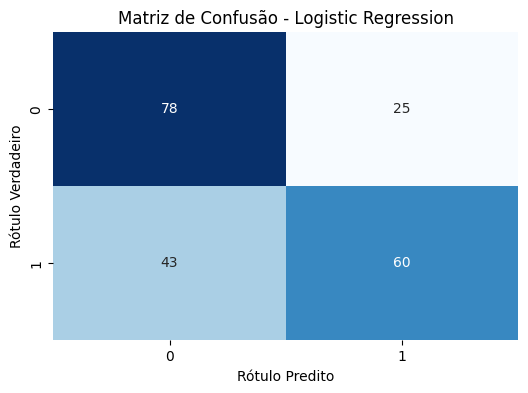

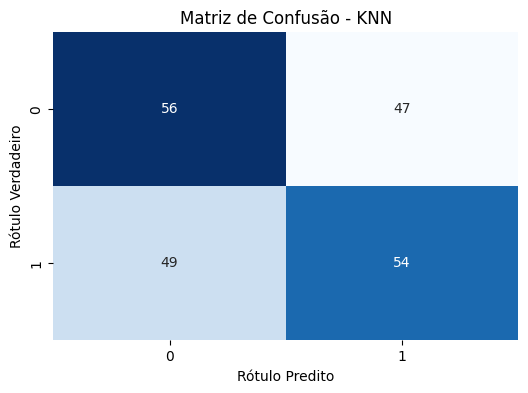

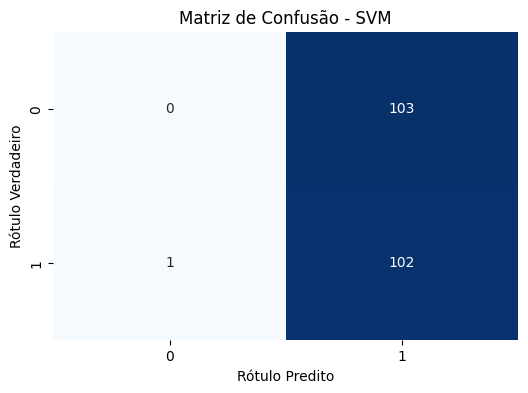

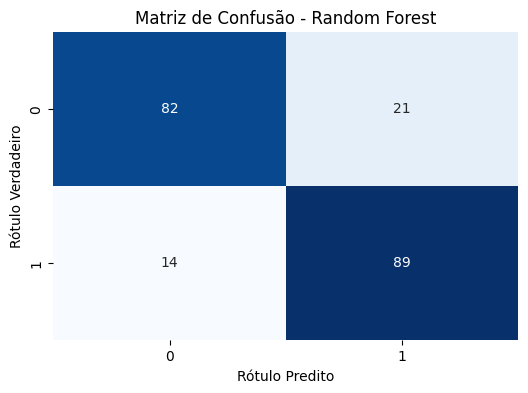

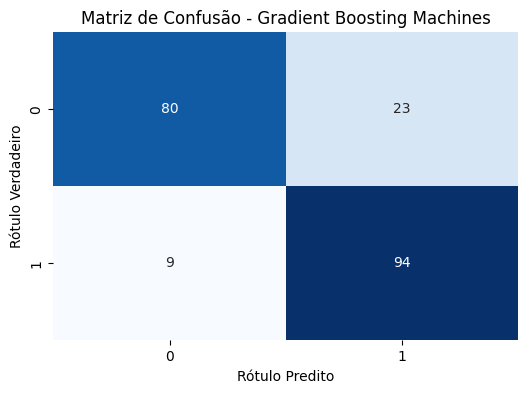

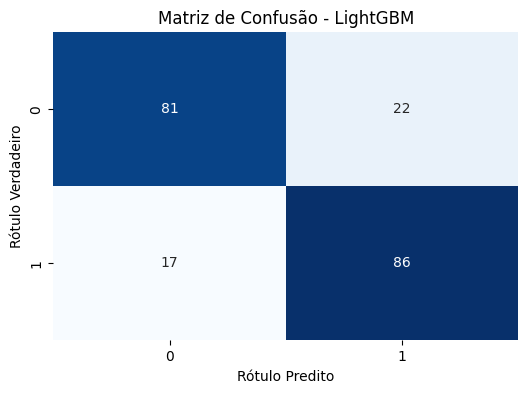

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Rótulo Predito')
    plt.ylabel('Rótulo Verdadeiro')
    plt.show()

## Calcular e visualizar a curva roc e auc


Para cada modelo treinado, calcular a Curva Característica de Operação do Receptor (ROC) e a Área Sob a Curva (AUC) nos dados de teste e gerar os gráficos correspondentes.


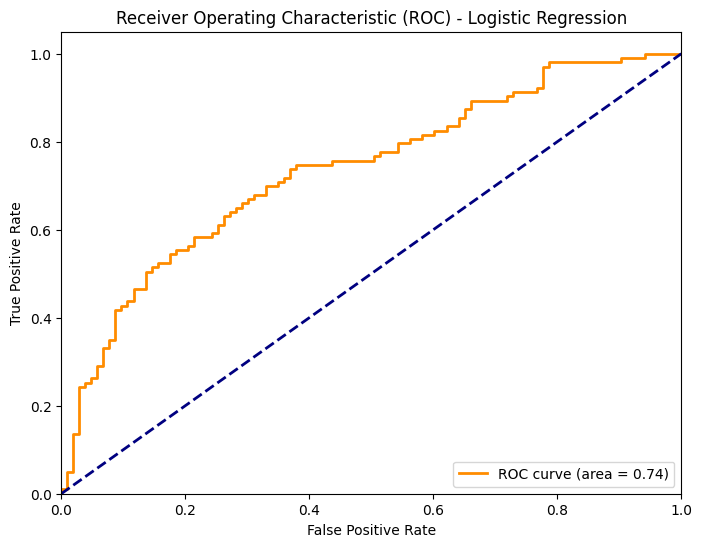

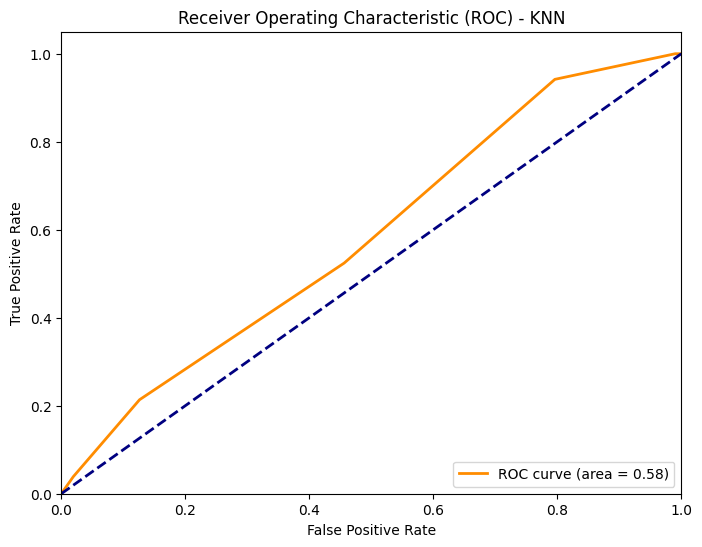

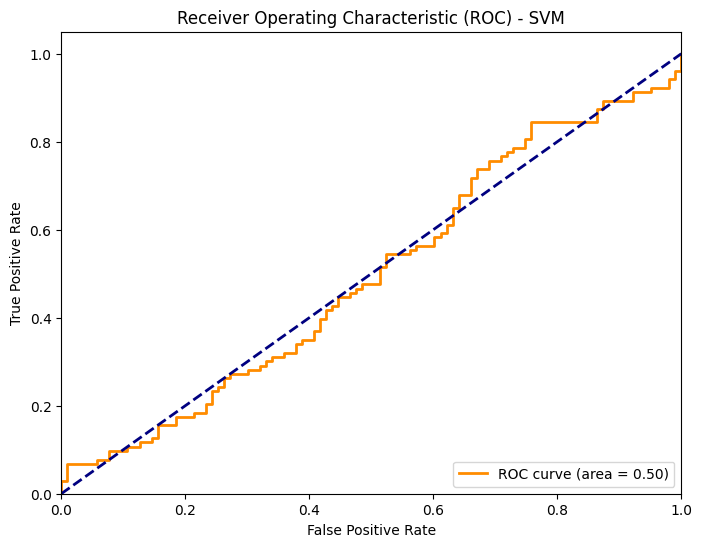

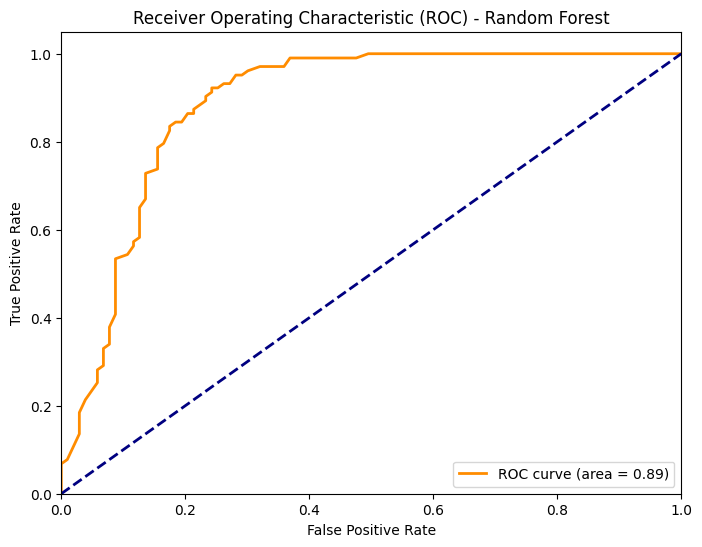

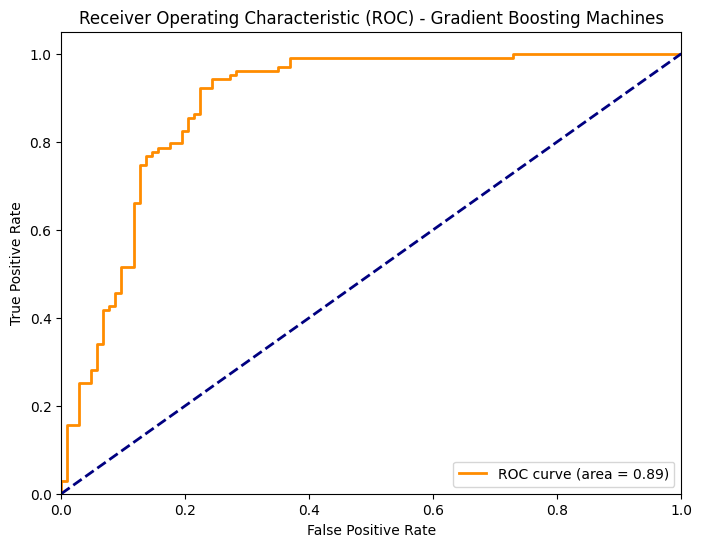

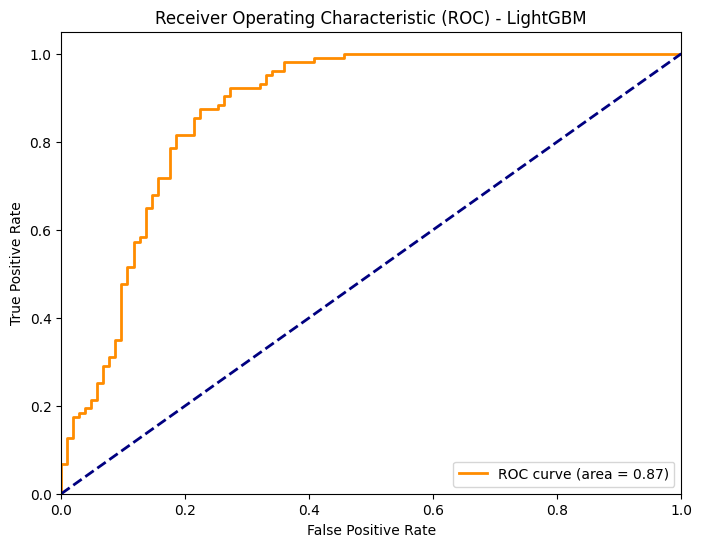

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for name, model in models:
    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVC with default settings
        y_pred_proba = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {name}')
    plt.legend(loc="lower right")
    plt.show()


## Comparar desempenho em treino e teste




In [21]:
overfitting_results = {}

for name, model in models:
    y_train_pred = model.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred)

    overfitting_results[name] = {'F1-Score (Train)': f1_train, 'F1-Score (Test)': f1_test}

df_overfitting = pd.DataFrame.from_dict(overfitting_results, orient='index')

display(df_overfitting)

,F1-Score (Train),F1-Score (Test)
Logistic Regression,0.627249,0.638298
KNN,0.724672,0.529412
SVM,0.674212,0.662338
Random Forest,1.000000,0.835681
Gradient Boosting Machines,0.974178,0.854545
LightGBM,1.000000,0.815166


## Resumir a análise


Discutir os resultados da Matriz de Confusão, Curva ROC e comparação treino/teste para fornecer uma análise abrangente do desempenho de cada modelo.


In [22]:
print("--- Model Performance Analysis ---")

for name, model in models:
    print(f"\n--- {name} ---")

    # Confusion Matrix Analysis
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"Confusion Matrix:\n{cm}")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    # ROC and AUC Analysis
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    # Train/Test Performance Analysis (using F1-Score from previous step)
    if name in df_overfitting.index:
        f1_train = df_overfitting.loc[name, 'F1-Score (Train)']
        f1_test = df_overfitting.loc[name, 'F1-Score (Test)']
        print(f"F1-Score (Train): {f1_train:.4f}")
        print(f"F1-Score (Test): {f1_test:.4f}")
        print(f"F1-Score Difference (Train - Test): {(f1_train - f1_test):.4f}")


print("\n--- Overall Model Comparison ---")
print("Comparing models based on F1-Score on the test set (higher is better) and AUC (higher is better).")
print("Also considering the F1-Score difference between train and test sets (lower is better for less overfitting).")

# Display the sorted metrics table again for easy comparison
display(df_metrics_sorted)

# Analyze and summarize
best_f1_model = df_metrics_sorted.index[0]
print(f"\nModel with the highest F1-Score on the test set: {best_f1_model}")

# Find the model with the highest AUC (need to recalculate or store AUC values)
auc_values = {}
for name, model in models:
     if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
     else:
        y_pred_proba = model.decision_function(X_test)
     auc_values[name] = auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1])

best_auc_model = max(auc_values, key=auc_values.get)
print(f"Model with the highest AUC on the test set: {best_auc_model}")

# Analyze overfitting based on F1-Score difference
df_overfitting['F1_Difference'] = df_overfitting['F1-Score (Train)'] - df_overfitting['F1-Score (Test)']
df_overfitting_sorted_diff = df_overfitting.sort_values(by='F1_Difference')
least_overfitting_model = df_overfitting_sorted_diff.index[0]
print(f"Model with the least F1-Score difference (least overfitting): {least_overfitting_model}")

print("\n--- Summary per Model ---")
for name, model in models:
    print(f"\n{name}:")
    if name in df_metrics.index:
        print(f"  Accuracy: {df_metrics.loc[name, 'Accuracy']:.4f}")
        print(f"  Precision: {df_metrics.loc[name, 'Precision']:.4f}")
        print(f"  Recall: {df_metrics.loc[name, 'Recall']:.4f}")
        print(f"  F1-Score (Test): {df_metrics.loc[name, 'F1-Score']:.4f}")
    if name in auc_values:
         print(f"  AUC: {auc_values[name]:.4f}")
    if name in df_overfitting.index:
         print(f"  F1-Score (Train): {df_overfitting.loc[name, 'F1-Score (Train)']:.4f}")
         print(f"  F1-Score Difference: {df_overfitting.loc[name, 'F1_Difference']:.4f}")

    # Interpret Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    total_samples = tn + fp + fn + tp
    print(f"  Confusion Matrix (TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn})")
    print(f"  Interpretation:")
    print(f"    Correctly predicted 'Alta' (TP): {tp} out of {tp + fn} actual 'Alta' instances.")
    print(f"    Correctly predicted 'Baixa' (TN): {tn} out of {tn + fp} actual 'Baixa' instances.")
    print(f"    Incorrectly predicted 'Alta' (FP): {fp} out of {tn + fp} actual 'Baixa' instances.")
    print(f"    Incorrectly predicted 'Baixa' (FN): {fn} out of {tp + fn} actual 'Alta' instances.")

# Get the names of Random Forest and LightGBM models
random_forest_name = "Random Forest"
lightgbm_name = "LightGBM"


print("\n--- Conclusion ---")
print(f"Based on the F1-Score and AUC on the test set, {best_f1_model} appears to be the most suitable model for this task.")
print(f"It achieved the highest F1-Score ({df_metrics.loc[best_f1_model, 'F1-Score']:.4f}) and a high AUC ({auc_values[best_f1_model]:.4f}).")
print(f"While models like {random_forest_name} and {lightgbm_name} show signs of overfitting with perfect or near-perfect training scores and larger differences compared to their test scores, {best_f1_model} demonstrates a good balance between training and testing performance, indicating better generalization.")

--- Model Performance Analysis ---

--- Logistic Regression ---
Confusion Matrix:
[[78 25]
 [43 60]]
True Positives (TP): 60
True Negatives (TN): 78
False Positives (FP): 25
False Negatives (FN): 43
AUC: 0.7364
F1-Score (Train): 0.6272
F1-Score (Test): 0.6383
F1-Score Difference (Train - Test): -0.0110

--- KNN ---
Confusion Matrix:
[[56 47]
 [49 54]]
True Positives (TP): 54
True Negatives (TN): 56
False Positives (FP): 47
False Negatives (FN): 49
AUC: 0.5829
F1-Score (Train): 0.7247
F1-Score (Test): 0.5294
F1-Score Difference (Train - Test): 0.1953

--- SVM ---
Confusion Matrix:
[[  0 103]
 [  1 102]]
True Positives (TP): 102
True Negatives (TN): 0
False Positives (FP): 103
False Negatives (FN): 1
AUC: 0.4972
F1-Score (Train): 0.6742
F1-Score (Test): 0.6623
F1-Score Difference (Train - Test): 0.0119

--- Random Forest ---
Confusion Matrix:
[[82 21]
 [14 89]]
True Positives (TP): 89
True Negatives (TN): 82
False Positives (FP): 21
False Negatives (FN): 14
AUC: 0.8863
F1-Score (Train): 

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting Machines,0.8447,0.8182,0.8738,0.8451
LightGBM,0.8398,0.8142,0.8641,0.8384
Random Forest,0.8350,0.8018,0.8738,0.8362
Logistic Regression,0.7816,0.7455,0.8155,0.7789
KNN,0.7718,0.7684,0.7184,0.7426
SVM,0.5000,0.5000,1.0000,0.6667



Model with the highest F1-Score on the test set: Gradient Boosting Machines
Model with the highest AUC on the test set: Gradient Boosting Machines
Model with the least F1-Score difference (least overfitting): Logistic Regression

--- Summary per Model ---

Logistic Regression:
  Accuracy: 0.7816
  Precision: 0.7455
  Recall: 0.8155
  F1-Score (Test): 0.7789
  AUC: 0.7364
  F1-Score (Train): 0.6272
  F1-Score Difference: -0.0110
  Confusion Matrix (TP: 60, TN: 78, FP: 25, FN: 43)
  Interpretation:
    Correctly predicted 'Alta' (TP): 60 out of 103 actual 'Alta' instances.
    Correctly predicted 'Baixa' (TN): 78 out of 103 actual 'Baixa' instances.
    Incorrectly predicted 'Alta' (FP): 25 out of 103 actual 'Baixa' instances.
    Incorrectly predicted 'Baixa' (FN): 43 out of 103 actual 'Alta' instances.

KNN:
  Accuracy: 0.7718
  Precision: 0.7684
  Recall: 0.7184
  F1-Score (Test): 0.7426
  AUC: 0.5829
  F1-Score (Train): 0.7247
  F1-Score Difference: 0.1953
  Confusion Matrix (TP: 54

## Gráficos Comparativos dos Modelos

Os gráficos abaixo visualizam as métricas de avaliação para cada modelo treinado, facilitando a comparação do desempenho.

/tmp/ipython-input-362872479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics_sorted.index, y=df_metrics_sorted[metric], palette='viridis')


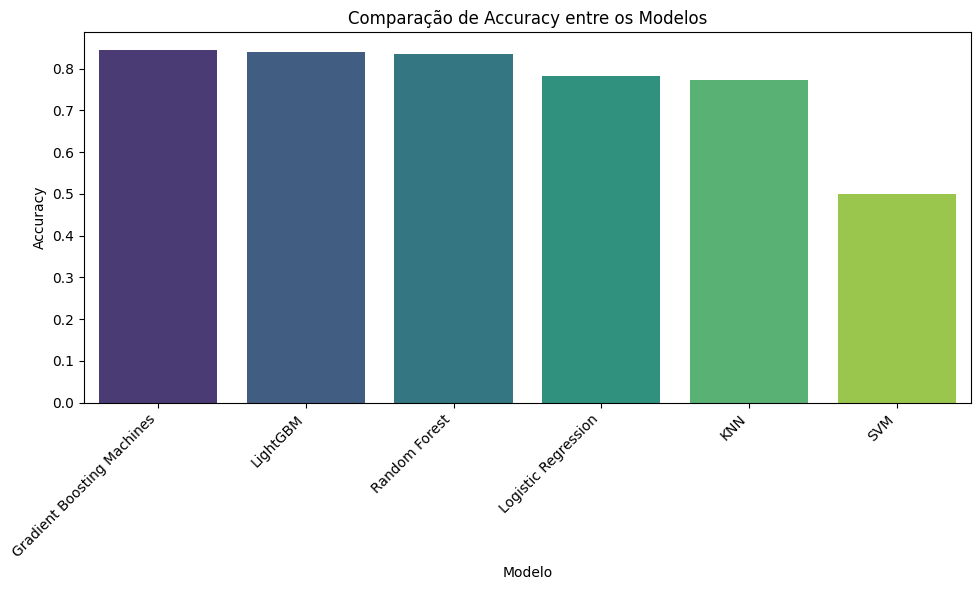

/tmp/ipython-input-362872479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics_sorted.index, y=df_metrics_sorted[metric], palette='viridis')


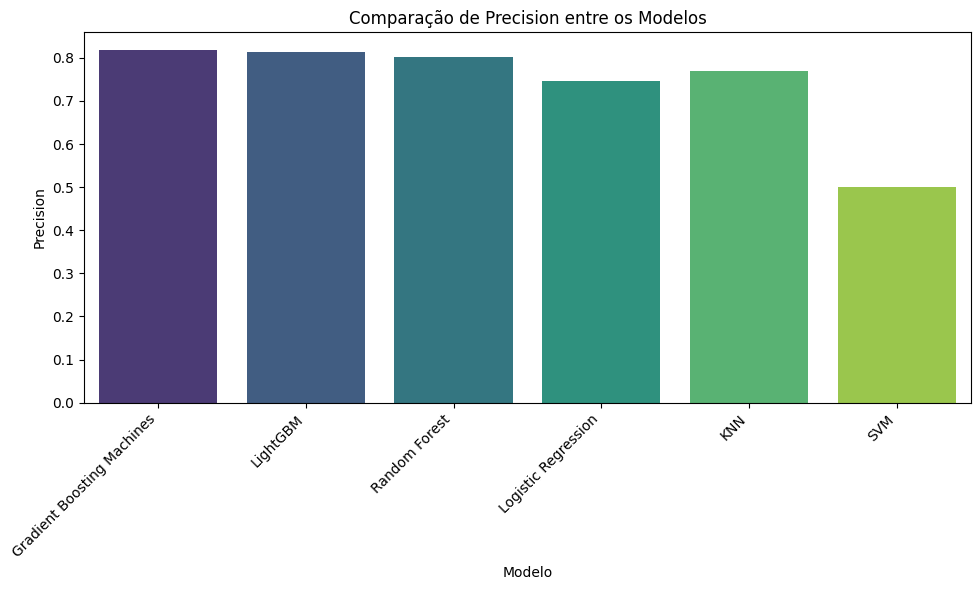

/tmp/ipython-input-362872479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics_sorted.index, y=df_metrics_sorted[metric], palette='viridis')


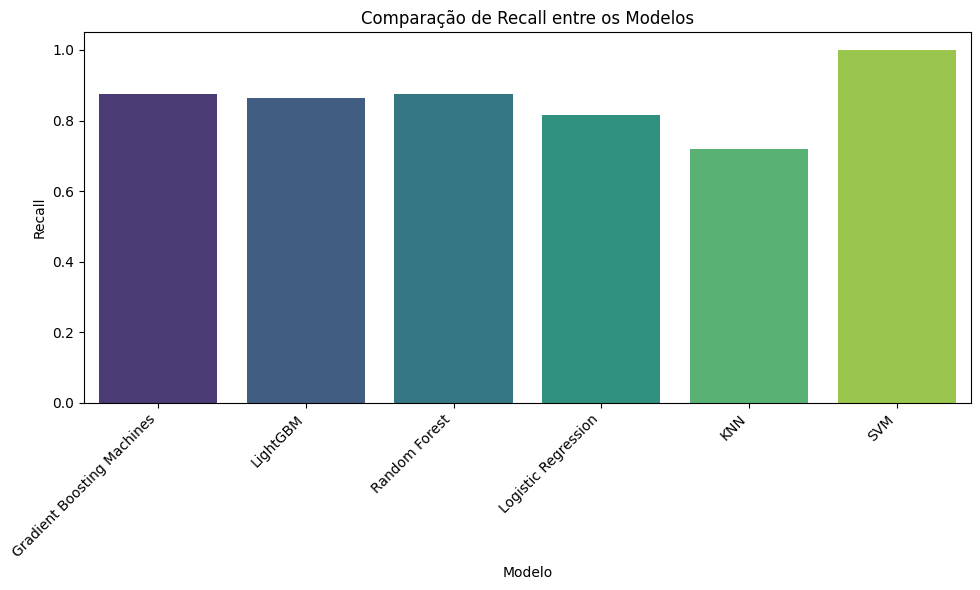

/tmp/ipython-input-362872479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics_sorted.index, y=df_metrics_sorted[metric], palette='viridis')


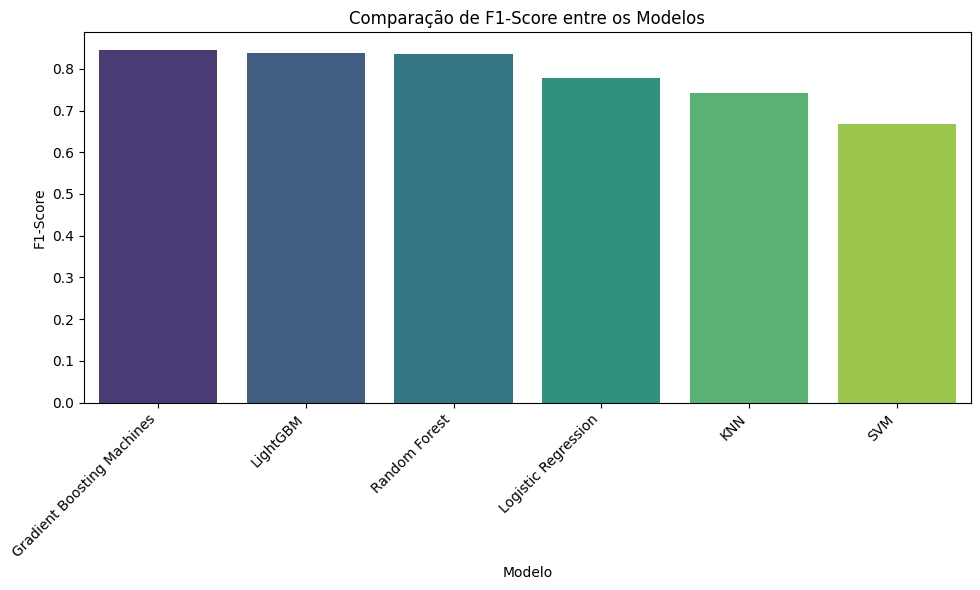

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df_metrics_sorted = df_metrics.sort_values(by='F1-Score', ascending=False)

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_metrics_sorted.index, y=df_metrics_sorted[metric], palette='viridis')
    plt.title(f'Comparação de {metric} entre os Modelos')
    plt.ylabel(metric)
    plt.xlabel('Modelo')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Dashboard de Comparação dos Modelos

A tabela abaixo apresenta as métricas de avaliação (Accuracy, Precision, Recall e F1-Score) para cada modelo treinado, ordenada pelo F1-Score para facilitar a identificação do modelo com melhor desempenho.

In [24]:
display(df_metrics_sorted)

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting Machines,0.8447,0.8182,0.8738,0.8451
LightGBM,0.8398,0.8142,0.8641,0.8384
Random Forest,0.8350,0.8018,0.8738,0.8362
Logistic Regression,0.7816,0.7455,0.8155,0.7789
KNN,0.7718,0.7684,0.7184,0.7426
SVM,0.5000,0.5000,1.0000,0.6667


## Usando modelo Gradient Boosting Machines para treinamento


In [25]:
# Assuming the Gradient Boosting Machines model is available from the previous training step
# If not, re-train the model or access the trained model from the 'models' list

# Find the Gradient Boosting Machines model from the list
gbm_model = None
for name, model in models:
    if name == 'Gradient Boosting Machines':
        gbm_model = model
        break

if gbm_model:
    # Make predictions on the test set
    y_pred_gbm = gbm_model.predict(X_test)

    # Create a DataFrame to display actual vs predicted values
    results_df = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': y_pred_gbm})

    # Display the first few rows of the results
    display(results_df.head())

    # Display the full results
    # display(results_df) # Uncomment this line to see all test predictions

else:
    print("Gradient Boosting Machines model not found.")

,Actual Target,Predicted Target
379,0,0
623,1,1
350,1,1
196,0,0
514,1,1


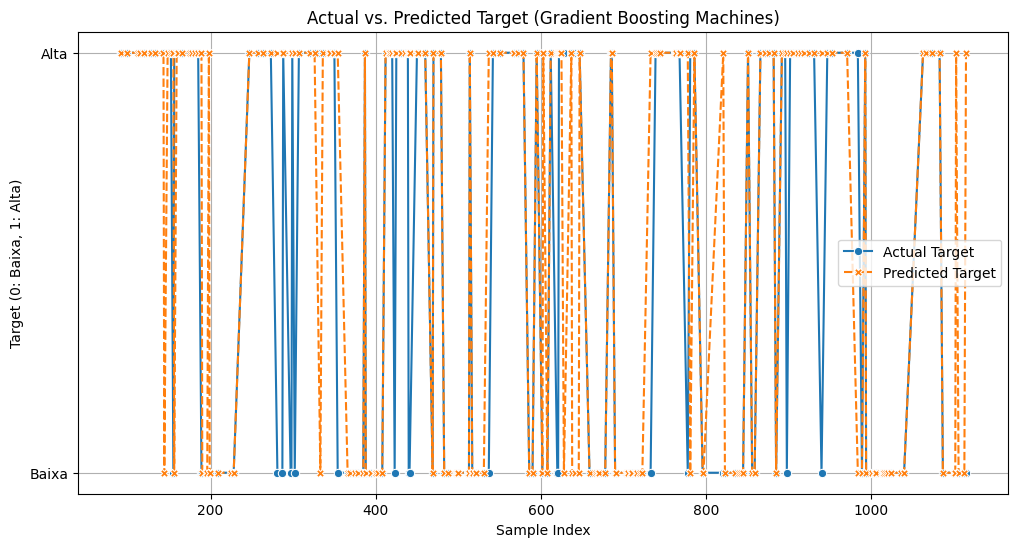

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the results_df DataFrame is available
if 'results_df' in locals():
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results_df, markers=True)
    plt.title('Actual vs. Predicted Target (Gradient Boosting Machines)')
    plt.xlabel('Sample Index')
    plt.ylabel('Target (0: Baixa, 1: Alta)')
    plt.yticks([0, 1], ['Baixa', 'Alta'])
    plt.grid(True)
    plt.show()
else:
    print("results_df DataFrame not found. Please run the previous cell to generate it.")

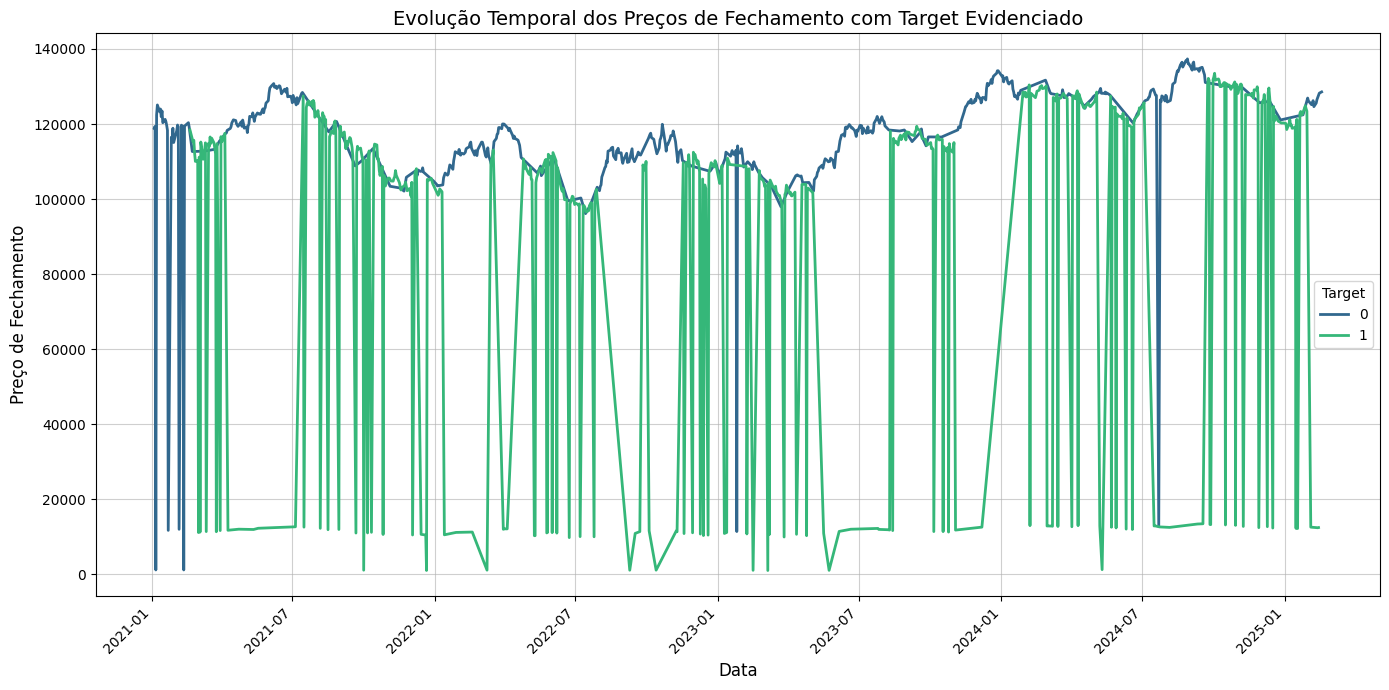

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plot the closing price line, colored by the 'Target' variable
sns.lineplot(data=df_ibovespa, x='Data', y='Último', hue='Target', palette='viridis', linewidth=2)

plt.title('Evolução Temporal dos Preços de Fechamento com Target Evidenciado', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento', fontsize=12)
plt.grid(True, alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Evolução Temporal dos Preços de Fechamento

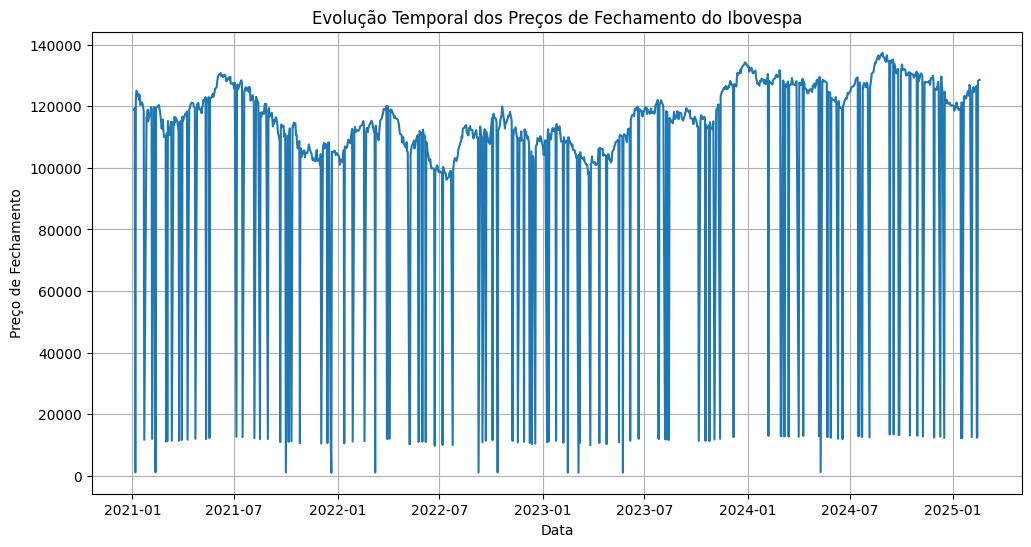

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ibovespa, x='Data', y='Último')
plt.title('Evolução Temporal dos Preços de Fechamento do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()